# RandomForest

### Imports

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
from fastai.imports import *
from fastai.tabular import *

from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import metrics
from IPython.display import display, Image

from pandas.api.types import is_string_dtype, is_numeric_dtype

In [3]:
??display

In [4]:
PATH = "data/bulldozers/"

In [5]:
!ls {PATH}

Train.csv


### Blue Book for Bulldozers

### Data

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration. The data is sourced from auction result postings and includes information on usage and equipment configurations."

In [52]:
!head data/bulldozers/Train.csv

In [7]:
name = "sgm"

In [8]:
f"Hi {name.capitalize()}"

'Hi Sgm'

The key fields are in train.csv are:

SalesID: the unique identifier of the sale
MachineID: the unique identifier of a machine. A machine can be sold multiple times
saleprice: what the machine sold for at auction (only provided in train.csv)
saledate: the date of the sale

In [9]:
df_raw=pd.read_csv(f"{PATH}Train.csv",low_memory=False,parse_dates=["saledate"])

In [10]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [12]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [13]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaT,NaT,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaT,NaT,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaT,NaT,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaT,NaT,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaT,NaT,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaT,NaT,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaT,NaT,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaT,NaT,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17,2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   401125 non-null  int64         
 1   SalePrice                 401125 non-null  int64         
 2   MachineID                 401125 non-null  int64         
 3   ModelID                   401125 non-null  int64         
 4   datasource                401125 non-null  int64         
 5   auctioneerID              380989 non-null  float64       
 6   YearMade                  401125 non-null  int64         
 7   MachineHoursCurrentMeter  142765 non-null  float64       
 8   UsageBand                 69639 non-null   object        
 9   saledate                  401125 non-null  datetime64[ns]
 10  fiModelDesc               401125 non-null  object        
 11  fiBaseModel               401125 non-null  object        
 12  fi

In [15]:
len(df_raw.columns)

53

#### Initial Preprocessing

In this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [16]:
df_raw["SalePrice"] = np.log(df_raw["SalePrice"])

In [17]:
RandomForestRegressor

sklearn.ensemble._forest.RandomForestRegressor

In [18]:
m = RandomForestRegressor(n_jobs=-1)
# The following code is supposed to fail due to string values in the input data
m.fit(df_raw.drop("SalePrice" , axis=1), df_raw["SalePrice"])

ValueError: could not convert string to float: 'Low'

In [19]:
df_raw["saledate"]

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
401120   2011-11-02
401121   2011-11-02
401122   2011-11-02
401123   2011-10-25
401124   2011-10-25
Name: saledate, Length: 401125, dtype: datetime64[ns]

This dataset contains a mix of continuous and categorical variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.Without expanding date-time columns into these additional fields, we can't capture any trend/cyclical behavior as a function of time at any of these granularities.

In [20]:
# add_datepart??

Replacing saledate column with all possible features of datetype into new columns.
add_datepart — extract date-time features Elapsed represents how many days are elapsed since January 1st, 1970.

In [21]:
add_datepart(df_raw,"saledate")

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401120,6333336,9.259131,1840702,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401121,6333337,9.305651,1830472,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401122,6333338,9.350102,1887659,21439,149,1.0,2005,NaN,NaN,35NX2,...,2,2,306,False,False,False,False,False,False,1320192000
401123,6333341,9.104980,1903570,21435,149,2.0,2005,NaN,NaN,30NX,...,25,1,298,False,False,False,False,False,False,1319500800


In [22]:
len(df_raw.columns)

65

In [23]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [24]:
df_raw["saleYear"].head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call train_cats to convert strings to pandas categories.

train_cats — converts string to pandas category data type. We then replace categorical columns with category codes by running proc_df

In [25]:
def train_cats(df):
    """Change any columns of strings in a panda's dataframe to a column of
    categorical values. This applies the changes inplace.

    Parameters:
    -----------
    df: A pandas dataframe. Any columns of strings will be changed to
        categorical values.

    Examples:
    ---------

    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a

    note the type of col2 is string

    >>> train_cats(df)
    >>> df

       col1 col2
    0     1    a
    1     2    b
    2     3    a

    now the type of col2 is category
    """
    for n,c in df.items():
        if is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [26]:
train_cats(df_raw)

In [27]:
df_raw["UsageBand"].cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [28]:
df_raw["UsageBand"].cat.codes

0         1
1         1
2         0
3         0
4         2
         ..
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Length: 401125, dtype: int8

We can specify the order to use for categorical variables if we wish:

In [29]:
df_raw["UsageBand"].cat.set_categories(["High","Medium","Low"], ordered = True, inplace = True)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [30]:
df_raw["UasgeBand"] = df_raw["UsageBand"].cat.codes

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [31]:
display_all(df_raw.isnull().sum().sort_index()/len(df_raw))

Backhoe_Mounting            0.803872
Blade_Extension             0.937129
Blade_Type                  0.800977
Blade_Width                 0.937129
Coupler                     0.466620
Coupler_System              0.891660
Differential_Type           0.826959
Drive_System                0.739829
Enclosure                   0.000810
Enclosure_Type              0.937129
Engine_Horsepower           0.937129
Forks                       0.521154
Grouser_Tracks              0.891899
Grouser_Type                0.752813
Hydraulics                  0.200823
Hydraulics_Flow             0.891899
MachineHoursCurrentMeter    0.644089
MachineID                   0.000000
ModelID                     0.000000
Pad_Type                    0.802720
Pattern_Changer             0.752651
ProductGroup                0.000000
ProductGroupDesc            0.000000
ProductSize                 0.525460
Pushblock                   0.937129
Ride_Control                0.629527
Ripper                      0.740388
S

to_feather -->> dump the data as stored on memory, so that it can be stored and accessed efficiently.

In [32]:
os.makedirs("tmp", exist_ok = True)
df_raw.to_feather("tmp/bulldozers_raw")

Reading from the feather format

In [33]:
df_raw = pd.read_feather("tmp/bulldozers_raw")

Replacing categories with their numerics codes, handle missing continuous values and split dependent variable into seperate variable.

proc_df also replaces missing values of the continuous columns with the median and adds the column called [column name]_na and sets it to true to indicate it was missing.

In [34]:
def proc_df(df, y_fld=None, skip_flds=None, ignore_flds=None, do_scale=False, na_dict=None,
            preproc_fn=None, max_n_cat=None, subset=None, mapper=None):
    """ proc_df takes a data frame df and splits off the response variable, and
    changes the df into an entirely numeric dataframe. For each column of df
    which is not in skip_flds nor in ignore_flds, na values are replaced by the
    median value of the column.
    Parameters:
    -----------
    df: The data frame you wish to process.
    y_fld: The name of the response variable
    skip_flds: A list of fields that dropped from df.
    ignore_flds: A list of fields that are ignored during processing.
    do_scale: Standardizes each column in df. Takes Boolean Values(True,False)
    na_dict: a dictionary of na columns to add. Na columns are also added if there
        are any missing values.
    preproc_fn: A function that gets applied to df.
    max_n_cat: The maximum number of categories to break into dummy values, instead
        of integer codes.
    subset: Takes a random subset of size subset from df.
    mapper: If do_scale is set as True, the mapper variable
        calculates the values used for scaling of variables during training time (mean and standard deviation).
    Returns:
    --------
    [x, y, nas, mapper(optional)]:
        x: x is the transformed version of df. x will not have the response variable
            and is entirely numeric.
        y: y is the response variable
        nas: returns a dictionary of which nas it created, and the associated median.
        mapper: A DataFrameMapper which stores the mean and standard deviation of the corresponding continuous
        variables which is then used for scaling of during test-time.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> x, y, nas = proc_df(df, 'col1')
    >>> x
       col2
    0     1
    1     2
    2     1
    >>> data = DataFrame(pet=["cat", "dog", "dog", "fish", "cat", "dog", "cat", "fish"],
                 children=[4., 6, 3, 3, 2, 3, 5, 4],
                 salary=[90, 24, 44, 27, 32, 59, 36, 27])
    >>> mapper = DataFrameMapper([(:pet, LabelBinarizer()),
                          ([:children], StandardScaler())])
    >>>round(fit_transform!(mapper, copy(data)), 2)
    8x4 Array{Float64,2}:
    1.0  0.0  0.0   0.21
    0.0  1.0  0.0   1.88
    0.0  1.0  0.0  -0.63
    0.0  0.0  1.0  -0.63
    1.0  0.0  0.0  -1.46
    0.0  1.0  0.0  -0.63
    1.0  0.0  0.0   1.04
    0.0  0.0  1.0   0.21
    """
    
    if not ignore_flds: ignore_flds=[]
    if not skip_flds: skip_flds=[]
    if subset: df = get_sample(df,subset)
    else: df = df.copy()
    ignored_flds = df.loc[:, ignore_flds]
    df.drop(ignore_flds, axis=1, inplace=True)
    if preproc_fn: preproc_fn(df)
    if y_fld is None: y = None
    else:
        if not is_numeric_dtype(df[y_fld]): df[y_fld] = pd.Categorical(df[y_fld]).codes
        y = df[y_fld].values
        skip_flds += [y_fld]
    df.drop(skip_flds, axis=1, inplace=True)

    if na_dict is None: na_dict = {}
    else: na_dict = na_dict.copy()
    na_dict_initial = na_dict.copy()
    for n,c in df.items(): na_dict = fix_missing(df, c, n, na_dict)
    if len(na_dict_initial.keys()) > 0:
        df.drop([a + '_na' for a in list(set(na_dict.keys()) - set(na_dict_initial.keys()))], axis=1, inplace=True)
    if do_scale: mapper = scale_vars(df, mapper)
    for n,c in df.items(): numericalize(df, c, n, max_n_cat)
    df = pd.get_dummies(df, dummy_na=True)
    df = pd.concat([ignored_flds, df], axis=1)
    res = [df, y, na_dict]
    if do_scale: res = res + [mapper]
    return res    

In [35]:
def numericalize(df, col, name, max_n_cat):
    """ Changes the column col from a categorical type to it's integer codes.
    Parameters:
    -----------
    df: A pandas dataframe. df[name] will be filled with the integer codes from
        col.
    col: The column you wish to change into the categories.
    name: The column name you wish to insert into df. This column will hold the
        integer codes.
    max_n_cat: If col has more categories than max_n_cat it will not change the
        it to its integer codes. If max_n_cat is None, then col will always be
        converted.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    note the type of col2 is string
    >>> train_cats(df)
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    now the type of col2 is category { a : 1, b : 2}
    >>> numericalize(df, df['col2'], 'col3', None)
       col1 col2 col3
    0     1    a    1
    1     2    b    2
    2     3    a    1
    """
    if not is_numeric_dtype(col) and ( max_n_cat is None or len(col.cat.categories)>max_n_cat):
        df[name] = pd.Categorical(col).codes+1


In [36]:
def fix_missing(df, col, name, na_dict):
    """ Fill missing data in a column of df with the median, and add a {name}_na column
    which specifies if the data was missing.
    Parameters:
    -----------
    df: The data frame that will be changed.
    col: The column of data to fix by filling in missing data.
    name: The name of the new filled column in df.
    na_dict: A dictionary of values to create na's of and the value to insert. If
        name is not a key of na_dict the median will fill any missing data. Also
        if name is not a key of na_dict and there is no missing data in col, then
        no {name}_na column is not created.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {})
    >>> df
       col1 col2 col1_na
    0     1    5   False
    1     2    2    True
    2     3    2   False
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col2'], 'col2', {})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> df = pd.DataFrame({'col1' : [1, np.NaN, 3], 'col2' : [5, 2, 2]})
    >>> df
       col1 col2
    0     1    5
    1   nan    2
    2     3    2
    >>> fix_missing(df, df['col1'], 'col1', {'col1' : 500})
    >>> df
          col1 col2 col1_na
    0     1    5   False
    1   500    2    True
    2     3    2   False
    """
    if is_numeric_dtype(col):
        if pd.isnull(col).sum() or (name in na_dict):
            df[name+'_na'] = pd.isnull(col)
            filler = na_dict[name] if name in na_dict else col.median()
            df[name] = col.fillna(filler)
            na_dict[name] = filler
    return na_dict

In [37]:
def get_sample(df,n):
    """ Gets a random sample of n rows from df, without replacement.
    Parameters:
    -----------
    df: A pandas data frame, that you wish to sample from.
    n: The number of rows you wish to sample.
    Returns:
    --------
    return value: A random sample of n rows of df.
    Examples:
    ---------
    >>> df = pd.DataFrame({'col1' : [1, 2, 3], 'col2' : ['a', 'b', 'a']})
    >>> df
       col1 col2
    0     1    a
    1     2    b
    2     3    a
    >>> get_sample(df, 2)
       col1 col2
    1     2    b
    2     3    a
    """
    idxs = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[idxs].copy()


In [38]:
df, y, nas = proc_df(df_raw, "SalePrice")

In [39]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [40]:
df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,UasgeBand,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,999089,3157,121,3.0,2004,68.0,3,950,296,...,False,False,False,False,False,False,1163635200,2,False,False
1,1139248,117657,77,121,3.0,1996,4640.0,3,1725,527,...,False,False,False,False,False,False,1080259200,2,False,False
2,1139249,434808,7009,121,3.0,2001,2838.0,1,331,110,...,False,False,False,False,False,False,1077753600,0,False,False
3,1139251,1026470,332,121,3.0,2001,3486.0,1,3674,1375,...,False,False,False,False,False,False,1305763200,0,False,False
4,1139253,1057373,17311,121,3.0,2007,722.0,2,4208,1529,...,False,False,False,False,False,False,1248307200,1,False,False


In [41]:
m = RandomForestRegressor(n_jobs = -1, n_estimators = 10)
m.fit(df, y)
m.score(df, y)

0.9830106014854983

In statistics, the coefficient of determination, denoted R2 or r2 and pronounced "R squared", is the proportion of the variance in the dependent variable that is predictable from the independent variable(s). https://en.wikipedia.org/wiki/Coefficient_of_determination

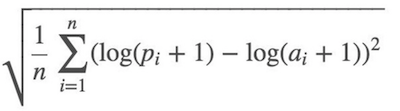

In [54]:
Image(filename = os.getcwd() + "/images/RMSLE.png")

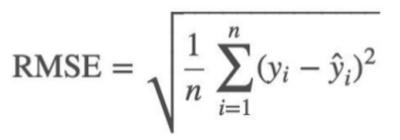

In [55]:
Image(filename = os.getcwd() + "/images/RMSE.png")

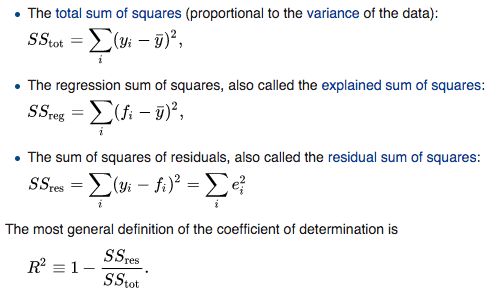

In [56]:
Image(filename = os.getcwd() + "/images/R2.png")

Possible range of R² :

Anything equal to or less than 1. If you predicted infinity for every row, R² = 1 −∞.
So when our R² is negative, it means your model is worse than predicting the mean.

R² is the ratio between how good our model is (RMSE) vs. how good is the naïve mean model (RMSE).

#### Fitting of Data

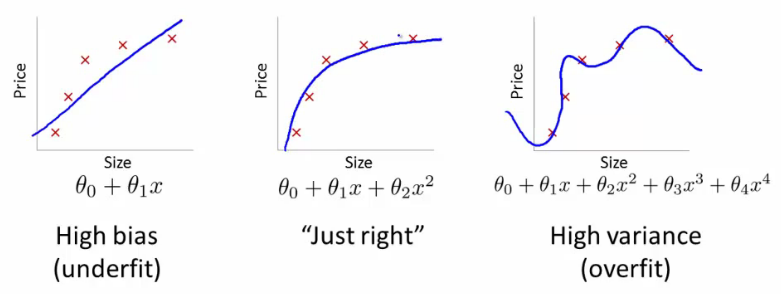

In [53]:
Image(filename = os.getcwd() + "/images/Fitting.png")

The most important idea in machine learning is that of having separate training & validation data sets.

Using all our data can lead to overfitting. A validation set helps diagnose this problem.

In [49]:
def split_vals(a,n):
    return a[:n].copy(),a[n:].copy()

In [50]:
n_valid = 12000
n_trn = len(df) - n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df, n_trn)
y_train,y_valid = split_vals(y, n_trn)
X_train.shape, X_valid.shape, y_train.shape

((389125, 67), (12000, 67), (389125,))

# Random Forests

Executing model again with seperate training and validation sets.Validation set and Test set are different

In [51]:
def rmse(x,y): 
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train),y_train), rmse(m.predict(X_valid),y_valid),
              m.score(X_train,y_train), m.score(X_valid,y_valid)]
    if hasattr(m, "oob_score_"): 
        res.append(m.oob_score_)
    print(res)

In [52]:
m = RandomForestRegressor(n_jobs = -1, n_estimators = 10)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 1min 16s, sys: 427 ms, total: 1min 16s
Wall time: 16.3 s
[0.09018354328220883, 0.24607267546262146, 0.9830023291440303, 0.8918628905769296]


R² is 0.982 on the training set, and only 0.889 on the validation set which might indicate that we are overfitting quite badly. But not too badly as RMSE of 0.25.

We don't choose random set of rows as a validation set, because if we did that, we would not be replicating the test set. The dates in the test set are a set of dates that are more recent than any date in the training set.

In general, anytime you are building a model that has a time element, you want your test set to be a separate time period and therefore you really need your validation set to be of separate time period as well.

Above would eventually have the possibility of overfitting on the validation set and when we try it on the test set it might turn out not to be very good.

## Speeding things up

Hyper parameters are tuning parameters that are going to change how your model behaves.
One way to speed things up is to pass in the subset parameter to proc_df which will randomly sample the data.

In [53]:
df_trn, y_trn, nas = proc_df(df_raw, "SalePrice", subset = 30000, na_dict = nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [54]:
m = RandomForestRegressor(n_jobs = -1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 28.4 s, sys: 47.3 ms, total: 28.5 s
Wall time: 4.23 s
[0.0917963082584867, 0.34471714623898747, 0.9815249635605094, 0.7877861397024593]


Resampling the training set into the first 20,000 out of a 30,000 subsets, it runs faster.

## Single Tree

In scikit-learn, trees are called estimators.

-n_estimators = 1 — create a forest with just one tree
-max_depth = 3 — to make it a small tree
=bootstrap = False — random forest randomizes bunch of things, we want to turn that off by this parameter

In [55]:
m = RandomForestRegressor(n_estimators = 1, max_depth = 3, bootstrap = False, n_jobs = -1)
m.fit(X_train,y_train)
print_score(m)

[0.522403789198668, 0.5820588545011273, 0.4016607274809979, 0.39496322215841173]


This small deterministic tree has R² of 0.396 after fitting so this is not a good model but better than the mean model since it is greater than 0

In [56]:
import IPython, graphviz
from sklearn.tree import export_graphviz
def draw_tree(t, df, size=10, ratio=0.6, precision=0):
    """ Draws a representation of a random forest in IPython.
    Parameters:
    -----------
    t: The tree you wish to draw
    df: The data used to train the tree. This is used to get the names of the features.
    """
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True,
                      special_characters=True, rotate=True, precision=precision)
    IPython.display.display(graphviz.Source(re.sub('Tree {',
       f'Tree {{ size={size}; ratio={ratio}', s)))


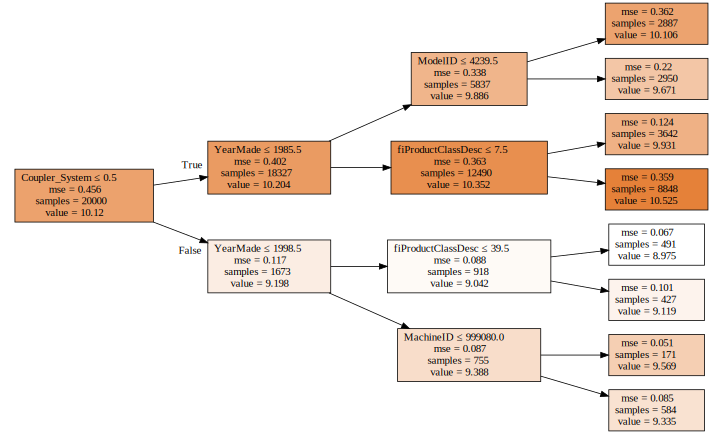

In [57]:
draw_tree(m.estimators_[0], df_trn, precision = 3)

A Tree consist of a sequence of Binary Decision used for splitting.

The first step is to create a tree. The first step to create a tree is to create the first binary decision. How are you going to do it?
-We need to pick a variable and the value to split on such that the two groups are as different to each other as possible
-For each variable, for each possible value of the possible value of that variable see whether it is better.
-To determine if it is better, we take weighted average of two new nodes.
-The resulting model will be similar to the naïve model of means — we have a model with a single binary decision.

for example,
For everybody with coupler_system greater than 0.5, we will fill in 10.206, for everybody else, we will put 9.178. Then we will calculate RMSE of this model.

Thus, we now have a single number that represents how good a split is which is the weighted average of the mean squared errors of the two groups that it creates.

Stopping condition for splitting:
When you hit the limit that was requested (max_depth)
When your leaf nodes only have one thing in them

If max_depth constraint is removed --> overfitting

By doing so, the training R² becomes 1 (as expected since each leaf node contains exactly one element) 

In [58]:
m = RandomForestRegressor(n_estimators = 1, bootstrap = False, n_jobs = -1)
m.fit(X_train, y_train)
print_score(m)

[4.864753555590494e-17, 0.47714535044642065, 1.0, 0.5934168592364361]


The training set result looks great! But the validation set is worse than our original model. This is why we need to use bagging of multiple trees to get more generalizable results.

## Bagging

To make these trees better, we will create a forest. To create a forest, we will use a statistical technique called bagging.
Random forest — a way of bagging trees.

Create multiple models (estimators) where their errors are un co-related to eachother as much as possible. Average of random errors (from each individual overfitting) is Zero

In [59]:
m = RandomForestRegressor(n_jobs = -1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 27.8 s, sys: 56.1 ms, total: 27.9 s
Wall time: 4.13 s
[0.09161874594449533, 0.34299892690976874, 0.9815963672490433, 0.7898963986435409]


Bagging is an interesting idea which is what if we created five different models each of which was only somewhat predictive but the models gave predictions that were not correlated with each other. That would mean that the five models would have profound different insights into the relationships in the data. If you took the average of those five models, you are effectively bringing in the insights from each of them. So this idea of averaging models is a technique for Ensembling.

What if we created a whole a lot of trees — big, deep, massively overfit trees but each one, let’s say, we only pick a random 1/10 of the data. Let’s say we do that a hundred times (different random sample every time). They are overfitting terribly but since they are all using different random samples, they all overfit in different ways on different things. In other words, they all have errors but the errors are random. The average of a bunch of random errors is zero. If we take the average of these trees each of which have been trained on a different random subset, the error will average out to zero and what is left is the true relationship — and that’s the random forest.

Here, models are based on different random subsets and their errors are not correlated with each other. If the errors were correlated, this will not work.


Note:-
In scikitlearn, for n rows pick out n rows with replacement.Thus on average 63.2% rows are represented and many of them will appear multiple times.

In practice, the difference between using the random forest space to find your nearest neighbors vs. Euclidean space is the difference between a model that makes good predictions and the model that makes meaningless predictions.

The effective machine learning model is accurate at finding the relationships in the training data and generalizes well to new data.

ExtraTreesRegressor is an extremely randomized tree model. It also has same api as RandomForestRegressor, but it randomly tries few splits of few variables instead of split of all variables.
It makes training much faster, has more randomness and can be used to get better generalization.

In [60]:
from sklearn.ensemble import ExtraTreesRegressor
e = ExtraTreesRegressor(n_jobs = -1)
%time e.fit(X_train, y_train)
print_score(e)

CPU times: user 19.2 s, sys: 78.4 ms, total: 19.3 s
Wall time: 2.93 s
[1.4533052630602895e-14, 0.3367013388437742, 1.0, 0.7975407328007242]


Grabbing the predictions for each individual tree, and looking at one example.

In [61]:
m = RandomForestRegressor(n_estimators = 10, n_jobs = -1)
%time m.fit(X_train,y_train)
print_score(m)

CPU times: user 2.82 s, sys: 231 µs, total: 2.82 s
Wall time: 678 ms
[0.1106588664959424, 0.38031691739320883, 0.973152286360164, 0.7416911639010537]


In [62]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:, 0], np.mean(preds[: ,0]), y_valid[0]

(array([8.922658, 8.987197, 9.10498 , 9.472705, 9.159047, 9.047821, 9.047821, 9.305651, 9.159047, 9.159047]),
 9.136597428245164,
 9.104979856318357)

The mean of 10 predictions for the first data is 9.13, and the actual value is 9.10. As we can see, none of the individual prediction is close to 9.10, but the mean ends up pretty good.

In [63]:
preds.shape

(10, 12000)

<IPython.core.display.Javascript object>


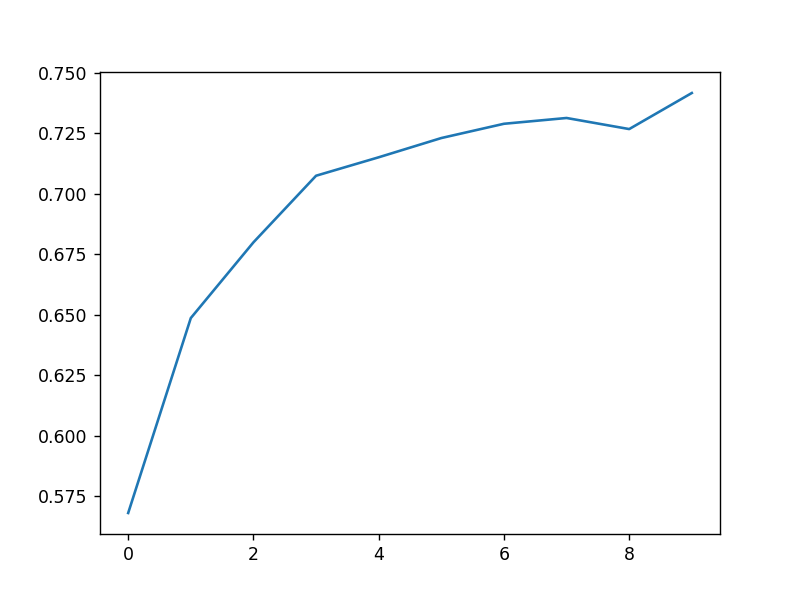

In [64]:
plt.figure()
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i +1], axis = 0)) for i in range(10)]);

Above is a plot of R² values given first i trees. As we add more trees, R² improves. But it seems as though it has flattened out.

In [65]:
m = RandomForestRegressor(n_estimators = 20, n_jobs = -1)
m.fit(X_train, y_train)
print_score(m)

[0.10067981144749104, 0.3423167060978717, 0.9777761314634362, 0.790731354618134]


In [66]:
m = RandomForestRegressor(n_estimators = 40, n_jobs = -1)
m.fit(X_train, y_train)
print_score(m)

[0.09430798564313567, 0.34233734129813287, 0.9805001257946914, 0.7907061240028315]


In [67]:
m = RandomForestRegressor(n_estimators = 80, n_jobs = -1)
m.fit(X_train, y_train)
print_score(m)

[0.09217101919803894, 0.34599276583058886, 0.9813738261615143, 0.7862126466012646]


In [69]:
print_score??

### Out-of-bag (OOB) score

Is our validation set worse than our training set because we're over-fitting, or because the validation set is for a different time period, or a bit of both? With the existing information we can't tell. However, RandomForests have out-of-bag (OOB) error which can handle this.

The idea is to calculate error on the training set, but only include the trees in the calculation of a row's error where that row was not included in training that tree. This will allow us to see whether the model is over-fitting, without needing a separate validation set.

This also has the benefit of allowing us to see whether our model generalizes, even if we only have a small amount of data so want to avoid separating some out to create a validation set.

In [71]:
m = RandomForestRegressor(n_estimators = 40,n_jobs = -1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[0.09466722788897657, 0.35271646719110633, 0.9803512832385302, 0.7778228221871599, 0.8602726043287134]


Gridsearch is used to search best hyperparamters.
oob_score can be used in it get the best hyperparamters

## Reducing over-fitting

### Subsampling

Instead of bootstrapping the entire set of rows, randomly sampling a subset of the data.

One of the easiest ways to avoid over-fitting is also one of the best ways to speed up analysis: subsampling.

In [74]:
df_trn, y_trn , nas = proc_df(df_raw, "SalePrice")
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn,n_trn)

The basic idea is this: rather than limit the total amount of data that our model can access, let's instead limit it to a different random subset per tree. That way, given enough trees, the model can still see all the data, but for each individual tree it'll be just as fast as if we had cut down our dataset as before.

In [75]:
from sklearn.ensemble import forest
def set_rf_samples(n):
    """ Changes Scikit learn's random forests to give each tree a random sample of
    n random rows.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n))
    
def reset_rf_samples():
    """ Undoes the changes produced by set_rf_samples.
    """
    forest._generate_sample_indices = (lambda rs, n_samples:
        forest.check_random_state(rs).randint(0, n_samples, n_samples))


/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [76]:
set_rf_samples(20000)

In [83]:
m = RandomForestRegressor(n_estimators = 10, n_jobs = -1, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

/opt/conda/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


CPU times: user 1min 14s, sys: 523 ms, total: 1min 14s
Wall time: 17.1 s
[0.09024363976308235, 0.24682012553094487, 0.9829796677910209, 0.8912049561148769, -1.3908880608870389]


Since each additional tree allows the model to see more data, this approach can make additional trees more useful.

In [81]:
m = RandomForestRegressor(n_estimators = 40, n_jobs = -1, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 5min 2s, sys: 1.47 s, total: 5min 4s
Wall time: 49.1 s
[0.07843119636221024, 0.23895810148105462, 0.9871438033933991, 0.8980255216697648, 0.9083799966380768]


### Tree building parameters

We revert to using a full bootstrap sample in order to show the impact of other over-fitting avoidance methods.

In [82]:
reset_rf_samples()

In [84]:
def dectree_max_depth(tree):
    children_left = tree.children_left
    children_right = tree.children_right

    def walk(node_id):
        if (children_left[node_id] != children_right[node_id]):
            left_max = 1 + walk(children_left[node_id])
            right_max = 1 + walk(children_right[node_id])
            return max(left_max, right_max)
        else: # leaf
            return 1

    root_node_id = 0
    return walk(root_node_id)

In [85]:
m = RandomForestRegressor(n_estimators = 40, n_jobs = -1, oob_score = True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 4min 57s, sys: 1.41 s, total: 4min 58s
Wall time: 48 s
[0.07828455828802576, 0.2379752671232116, 0.9871918313636293, 0.8988626383833048, 0.908322419027802]


Here OOB is higher than validation set. This is because our validation set is a different time period whereas OOB samples are random. It is much harder to predict a different time period

In [86]:
t = m.estimators_[0].tree_

In [87]:
dectree_max_depth(t)

45

#### min_samples_leaf

Another way to reduce over-fitting is to grow our trees less deeply. We do this by specifying (with min_samples_leaf) that we require some minimum number of rows in every leaf node. This has two benefits:

-There are less decision rules for each leaf node; simpler models should generalize better
-The predictions are made by averaging more rows in the leaf node, resulting in less volatility

In [88]:
m = RandomForestRegressor( n_estimators = 40, min_samples_leaf = 3, n_jobs= -1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[0.11487229577770171, 0.23333921456170068, 0.9724218310686433, 0.9027648166817889, 0.9086666255607141]


By using 3 instead of 1, validation R² improved from 0.89 to 0.90

#### max_features

We can also increase the amount of variation amongst the trees by not only use a sample of rows for each tree, but to also using a sample of *columns* for each *split*. We do this by specifying `max_features`, which is the proportion of features to randomly select from at each split.

0.5 means randomly choose a half of them. There are special values you can use such as sqrt or log2.Good values to use are 1, 0.5, log2, or sqrt

In [90]:
m = RandomForestRegressor(n_estimators = 40, min_samples_leaf = 3, max_features= 0.5,
                          n_jobs = -1, oob_score = True)
m.fit(X_train, y_train)
print_score(m)

[0.11914082520804338, 0.2284772725708627, 0.9703342020985648, 0.906774657941731, 0.9119122482398916]


The sklearn docs show an example of different max_features methods with increasing numbers of trees - as you see, using a subset of features on each split requires using more trees, but results in better models:

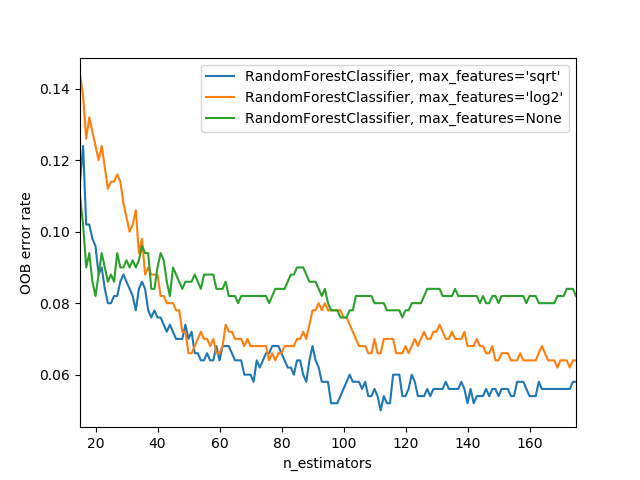

In [57]:
Image(filename = os.getcwd() + "/images/oob_vs_n_estimators.png")